In [1]:
from modules.experiments.quantum_hardware_capabilities_evaluation import *    
from modules.experiments.qpu_time_diagnostic import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set(style="whitegrid")

root_path = Path(Path().resolve()).parent.parent

experiment_path = root_path / "modules/experiments/qpu_time_diagnostic"
res_path = experiment_path / "results"
origin_df = load_dataframe(res_path)
main_c = "#53257F"
second_c = "#5C803C"
third_c = "#838383"

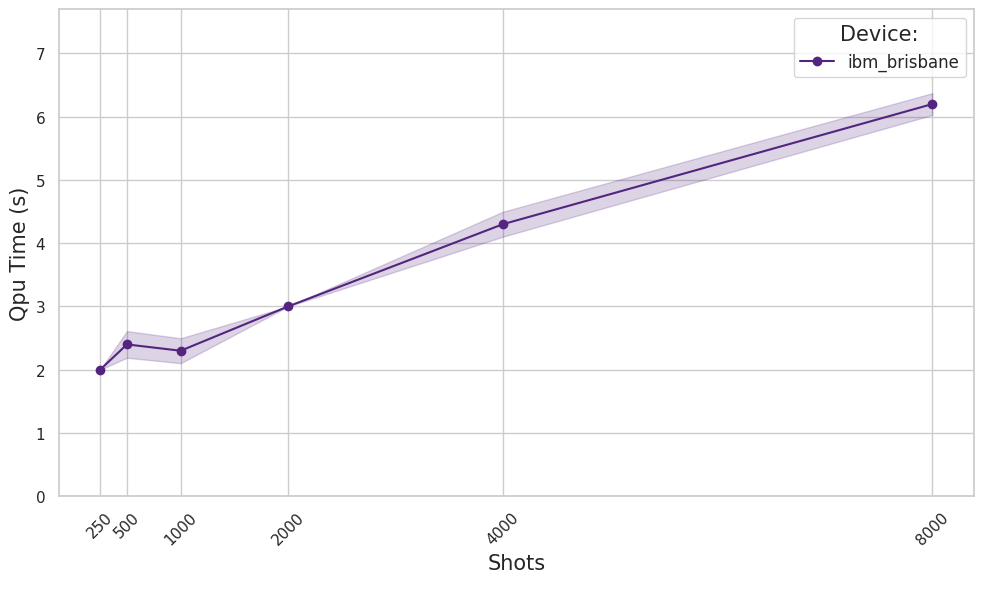

In [2]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each line with different styles
df = filter_df(
    origin_df,
    shots=[(10000, "<=")],
)
x, y, sd = get_line(df, "shots", "qpu_time")
plot_line(x, y, sd, "ibm_brisbane", marker='o', linestyle='-', color=main_c)
plt.ylabel("Qpu Time (s)", fontsize=15)
plt.xlabel("Shots\n", fontsize=15)
plt.legend(title='Device:', fontsize=12, title_fontsize='15')
plt.tight_layout()
plt.xticks(df["shots"].unique(), rotation=45)
plt.ylim((0, max(df["qpu_time"])*1.1))
plt.savefig(res_path / "qpu_time_results.pdf")
plt.show()
plt.close()